<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 1
<br>Group member1: Gasser Elbanna
<br>Group member2: Louise Placidet
<br>Group member3: Milo Imbeni

# Ex1: Create your favorite neuron

<font size ="3">Write some code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. One dendrite with three branches and the other with four branches. Show the resulting model. [0.5 pts]

In [9]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc
import numpy

# Creating Neuron Sections
soma, dend1, dend2, db1, db2, db3, db4, db5, db6, db7, axon = [h.Section(name=n) for n in ['soma', 'dend1', 'dend2', 'dend_branch1', 'dend_branch2', 'dend_branch3', 'dend_branch4', 'dend_branch5', 'dend_branch6', 'dend_branch7', 'axon']]

# Geometry 
for sec in h.allsec():
    if sec == 'soma':
        sec.L = sec.diam = 15
    else:
        sec.nseg = 10
        sec.L = 100
        for seg in sec:
            seg.diam = numpy.interp(seg.x, [0, 1], [1, 10])

# Connecting Sections
dend1.connect(soma(1))
dend2.connect(soma(1))

db1.connect(dend1(1))
db2.connect(dend1(1))
db3.connect(dend1(1))

db4.connect(dend2(1))
db5.connect(dend2(1))
db6.connect(dend2(1))
db7.connect(dend2(1))

axon.connect(soma(0))
h.topology()
        

neuron2swc('cell_trial.swc', swap_yz=False)
neuron_trial = nm.load_neuron('cell_trial.swc')
viewer.draw(neuron_trial)

# In your laptop
# Visualize in the Neuron GUI
s = h.Shape()
s.show(False)


|----------|       soma(0-1)
            `---------|       dend1(0-1)
                       `---------|       dend_branch1(0-1)
                       `---------|       dend_branch2(0-1)
                       `---------|       dend_branch3(0-1)
            `---------|       dend2(0-1)
                       `---------|       dend_branch4(0-1)
                       `---------|       dend_branch5(0-1)
                       `---------|       dend_branch6(0-1)
                       `---------|       dend_branch7(0-1)
 `---------|       axon(0-1)

Wrote cell 0 to cell_trial.swc


1.0

# Ex2: Visualizing neurons

<font size ="3">Select one of the neurons from your group data set. Write a code that visualize the neuron oriented on the three possible planes (xy, xz and yz), and in 3D, and plot each of its neurites (the neurites only need to be plotted in a single plane). Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have also their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. [1.5 pts]

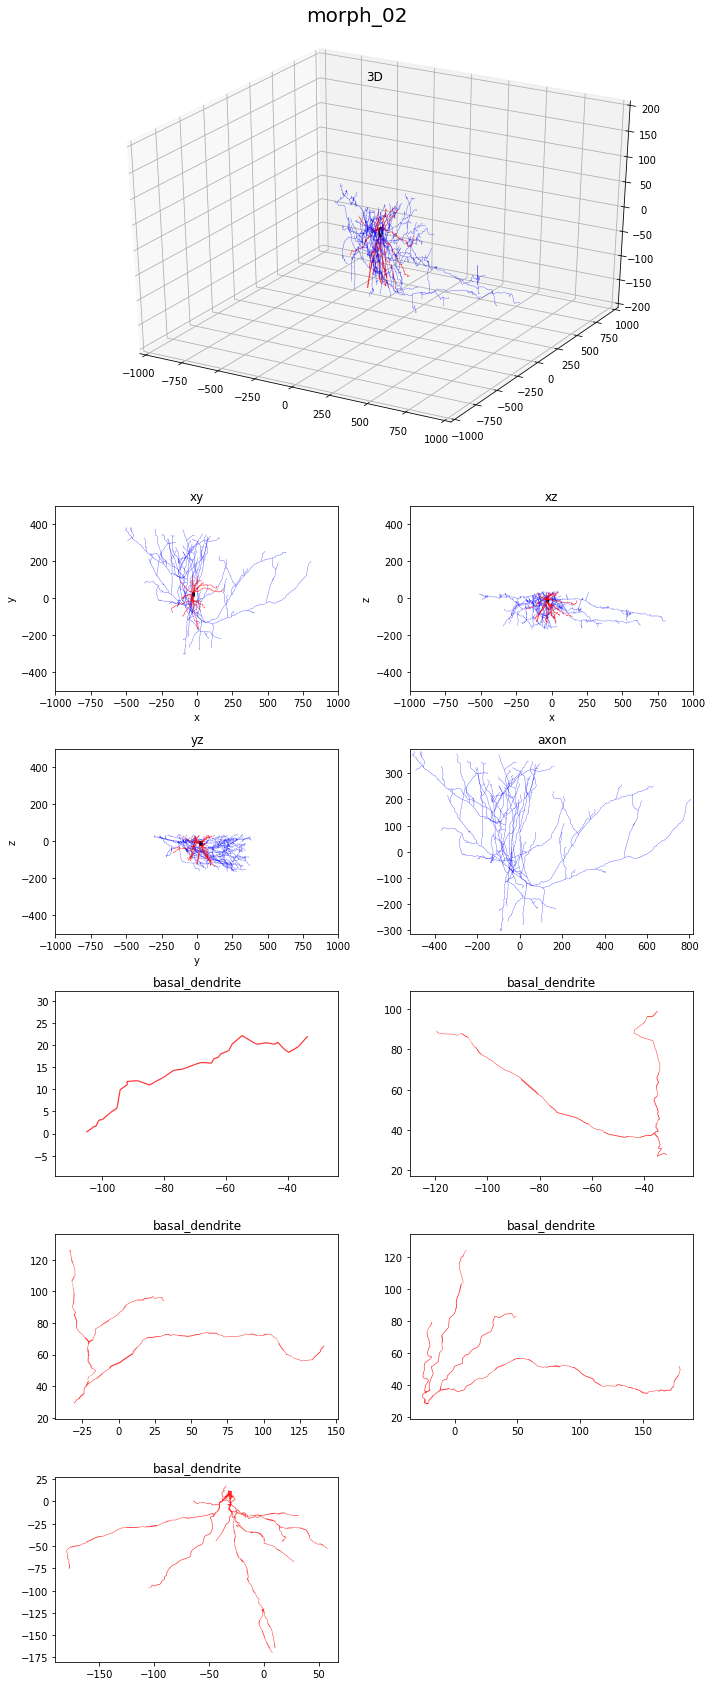

In [3]:
import neurom as nm
from neurom import viewer
from neurom.view import view
from neurom.view.common import update_plot_limits
import matplotlib.pyplot as plt

#Get Neuron Path, Load Neuron Morphology, Extract Neurites from Neuron object
nrn = 'Group_01/00/morph_02.swc'
neuron = nm.load_neuron(nrn)
neurites = neuron.neurites

# Create Figure to include all subplots
fig = plt.figure(figsize=(10, 40))

# Plot neuron in 3D in a subplot
axes = fig.add_subplot(12, 2, (1,4), projection='3d') # Add to the last subplot
nm.viewer.plot_neuron3d(axes, neuron)
axes.set_ylim((-1000, 1000))
axes.set_xlim((-1000, 1000))
axes.set_zlim(-200,200)
axes.set_title('3D')

# Plot Neuron in 2D in 3 planes
planes = ['xy', 'xz', 'yz']
for i, plane in enumerate(planes):
    axes = fig.add_subplot(12, 2, i+5)
    nm.viewer.plot_neuron(axes, neuron, plane=plane)
    axes.set_ylim((-500, 500))
    axes.set_xlim((-1000, 1000))
    axes.set_title(str(plane))

# Plot Neurites separately
for i, neurite in enumerate(neurites):
    current_axes = fig.add_subplot(12, 2, i+8)
    view.plot_tree(current_axes, neurite, plane='xy')
    update_plot_limits(current_axes, white_space=10)
    current_axes.set_title(str(neurite.type).split('.')[1])

# set a global title for the figure
fig.suptitle(neuron.name, y=1, fontsize=20)
fig.tight_layout()

# Ex3: Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, in your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. [1.5 pts]

In [4]:
# The structural checks concern the valid structure of a morphology.
# The neuron_checks are more specific to simulation.
# Options set the tolerance parameters for the checks.

config = {
    'checks': {
        'structural_checks': [
            'is_single_tree',
            'has_valid_soma',
            'has_soma_points',
            'has_sequential_ids',
            'has_increasing_ids',
            'has_valid_neurites',
            'no_missing_parents',
            'has_all_finite_radius_neurites'
        ],
        'neuron_checks': [
            'has_axon',
            'has_basal_dendrite',
            'has_apical_dendrite',
            'has_no_jumps',
            'has_no_fat_ends',
            'has_nonzero_soma_radius',
            'has_all_nonzero_neurite_radii',
            'has_all_nonzero_section_lengths',
            'has_all_nonzero_segment_lengths',
        ]
    },
    'options': {
        'has_nonzero_soma_radius': 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    }
}

In [5]:
import os
from neurom.check.runner import CheckRunner

# Create a "CheckRunner" object by providing the configuration dictionary
check_runner = CheckRunner(config)

# Run on a directory or a morphology
# Atention: change path_to_neurons to the path in which you have placed the files

directory = './Group_01/00/'

for filename in os.listdir(directory):
    if filename.endswith(".swc"): 
        
        path_to_neurons = directory+filename
        results = check_runner.run(path_to_neurons)
        print('Checking for morphology: '+str(filename))
        
        for morph in results['files']:
            print ("Morphology: {} \n".format(morph))
            checks_dict = results['files'][morph]

            # Empty strings for our results
            passed = ""
            failed = ""

            # Iterate over dictionary's items
            for check_name, status in checks_dict.items():
                
                # The string with the check's name and status
                string = "\t{0: <50} : {1}\n".format(check_name, status)
                
                # Separate passed from failed checks
                if status is True:
                    
                    passed += string # Concatenates to the current passed string
                
                else:
                    
                    failed += string # Concatenats to the current failed string
               
            print (passed)
            print (failed)
        
        continue
        
    else:
        print("Encountered a file which did not end with swc")
        break

                Has apical dendrite FAIL
                       Has no jumps FAIL
                                ALL FAIL


Checking for morphology: morph_01.swc
Morphology: ./Group_01/00/morph_01.swc 

	Is single tree                                     : True
	Has valid soma                                     : True
	Has soma points                                    : True
	Has sequential ids                                 : True
	Has increasing ids                                 : True
	Has valid neurites                                 : True
	No missing parents                                 : True
	Has all finite radius neurites                     : True
	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True

	Has apical dendrite               

                Has apical dendrite FAIL
                       Has no jumps FAIL
                                ALL FAIL


Checking for morphology: morph_02.swc
Morphology: ./Group_01/00/morph_02.swc 

	Is single tree                                     : True
	Has valid soma                                     : True
	Has soma points                                    : True
	Has sequential ids                                 : True
	Has increasing ids                                 : True
	Has valid neurites                                 : True
	No missing parents                                 : True
	Has all finite radius neurites                     : True
	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True

	Has apical dendrite               

                Has apical dendrite FAIL
                                ALL FAIL
     Has all finite radius neurites FAIL
                       Has no jumps FAIL
      Has all nonzero neurite radii FAIL
                                ALL FAIL
                           Has axon FAIL


Checking for morphology: morph_03.swc
Morphology: ./Group_01/00/morph_03.swc 

	Is single tree                                     : True
	Has valid soma                                     : True
	Has soma points                                    : True
	Has sequential ids                                 : True
	Has increasing ids                                 : True
	Has valid neurites                                 : True
	No missing parents                                 : True
	Has all finite radius neurites                     : True
	Has axon                                           : True
	Has basal dendrite                                 : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths    

                       Has no jumps FAIL
                                ALL FAIL


Checking for morphology: morph_05.swc
Morphology: ./Group_01/00/morph_05.swc 

	Is single tree                                     : True
	Has valid soma                                     : True
	Has soma points                                    : True
	Has sequential ids                                 : True
	Has increasing ids                                 : True
	Has valid neurites                                 : True
	No missing parents                                 : True
	Has all finite radius neurites                     : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths                    : True
	Has all nonzero segment lengths                    : True

	Has axon                          

                Has apical dendrite FAIL
                       Has no jumps FAIL
                    Has no fat ends FAIL
                                ALL FAIL


Checking for morphology: morph_07.swc
Morphology: ./Group_01/00/morph_07.swc 

	Is single tree                                     : True
	Has valid soma                                     : True
	Has soma points                                    : True
	Has sequential ids                                 : True
	Has increasing ids                                 : True
	Has valid neurites                                 : True
	No missing parents                                 : True
	Has all finite radius neurites                     : True
	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths    

                Has apical dendrite FAIL
                                ALL FAIL


Checking for morphology: morph_09.swc
Morphology: ./Group_01/00/morph_09.swc 

	Is single tree                                     : True
	Has valid soma                                     : True
	Has soma points                                    : True
	Has sequential ids                                 : True
	Has increasing ids                                 : True
	Has valid neurites                                 : True
	No missing parents                                 : True
	Has all finite radius neurites                     : True
	Has axon                                           : True
	Has basal dendrite                                 : True
	Has apical dendrite                                : True
	Has no jumps                                       : True
	Has no fat ends                                    : True
	Has nonzero soma radius                            : True
	Has all nonzero neurite radii                      : True
	Has all nonzero section lengths    

### According to the check runner, the files which did not pass the tests and presented errors were:
    - morph_01.swc
    - morph_02.swc
    - morph_03.swc
    - morph_04.swc
    - morph_05.swc
    - morph_08.swc
    - morph_10.swc
    
### The errors which were detected were the following:
    - has apical dendrite
    - has no jumps
    - has all finite radius neurites
    - has all nonzero neurite radii
    - has axon
    - has no fat ends
    

#### Has apical dendrite: 
The first error detected by the check runner indicates that the neuron has no apical dendrite associated to it.  The reason behind this error could be that it was either mislabeled or it was not found because cut off or belonging to another slice. 

#### Has no jumps: 
The second error indicates that there are jumps (z-jumps) present in the tracing of the 3D reconstruction.  

#### Has all finite radius neurites: 
The third error reveals that some of the neurites do not have finite radius.  This checks if there are points with zero radius, meaning that the tracing connected two points where there was no neurite, or the diameter of the neurite was too small.  

#### Has all nonzero neurite radii: 
The fourth error indicates that some neurites have zero radius, meaning that some of the tracing do not actually contain dendrites, or the dendrites have radius which have shrunk too much. 

#### Has axon: 
The fith error indicates that one morphology did not have an axon.  This error might be due to the fact that it was either misclassified or that it was not contained in the observed slice.  

#### Has no fat ends: 
The final error indicates that some of the morphologies contain fat ends.  This could also be due to the fact that the ends were cut off so they do not converge to a point, but actually continue on to other slices.   

#### SOLUTIONS:
To resolve these errors, there are two methods to go about it, either automatically or manually.  In some cases, automatic solutions can be easily implemented in a "best guess" manner.  For instance, with the Z-Jumps, one can reconnect them according to several methods: either proximity, or trying to create the least sharp angles.

On the other hand, some errors need to be dealt with manually, by going back to the sample.  Indeed, if the morphology is cut off due to the slice limit or issues related to the depth/focus of the microscope, it is best to manually inspect the issue.  This should be implemented most notably for the following errors depicted above: morphologies which have neurites with no finite radius, neurites with zero radius, or morphologies without axons or which have fat ends.

For the first error (indicating that the morphology has no apical dendrite associated to it), one could go back to the 3D reconstruction and analyze if the the dendrite was not mislabeled or belonging to the neighboring slice.  It could also be that the neurons may not have apical dendrites.

# Ex4: Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Represent the result of all the cells using histograms. Find the morphometric charachteristics that best enable you to classify the cells into different groups. Would using a combination of morphometric characteristics improve the classification? Plot the results in a scatter plot[2.5 pts]

### Plotting Histogram of 7 morphometric characteristics selected upon reviewing the mentioned papers below, for the cells that passed the tests:

    - Soma Radii
    - Sholl Frequency
    - Partition_asymmetry
    - Local_bifurcation_angles
    - Number_of_bifurcations
    - Segment_taper_rates
    - Section_lengths

In [38]:
def histogram(data, ax):
    """Generates a histogram in a new figure"""
    
    # Create a histogram with specified bins and normalized
    ax.hist(data, bins=10) 
    ax.set_title(feature.replace('_', ' ')) # Replace the underscores with spaces in the string
    ax.set_xlabel('units')
    ax.set_ylabel('density')
    
    return ax

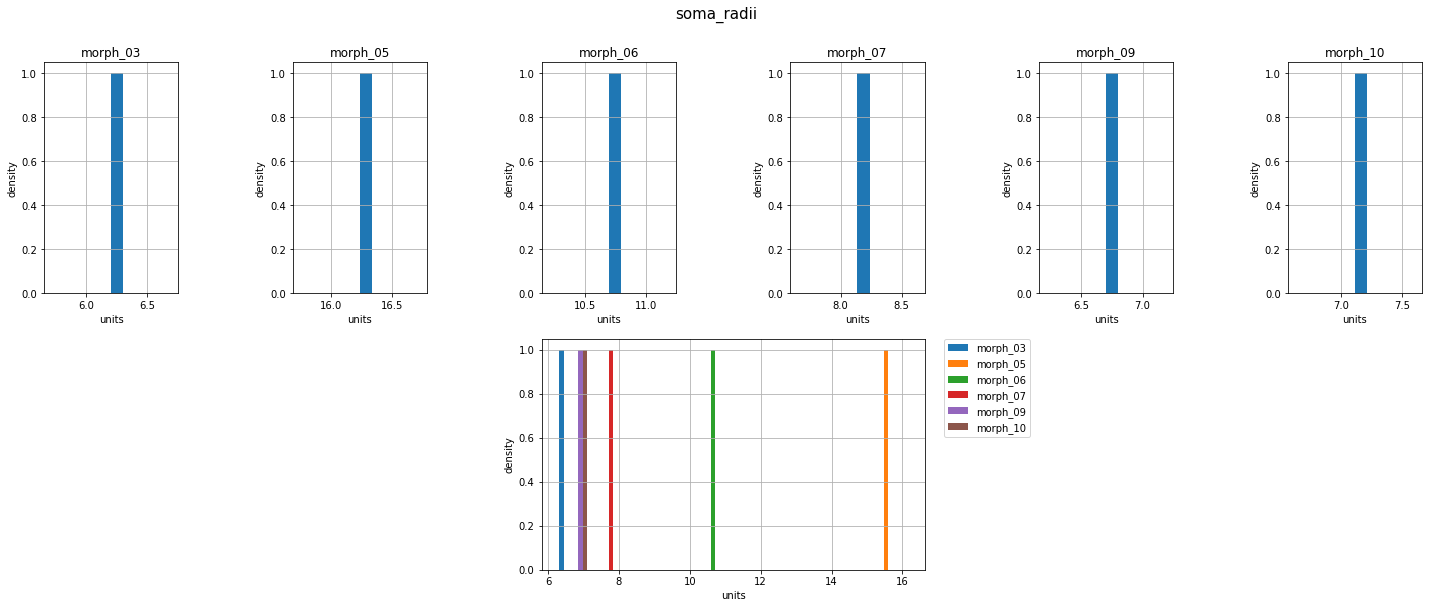

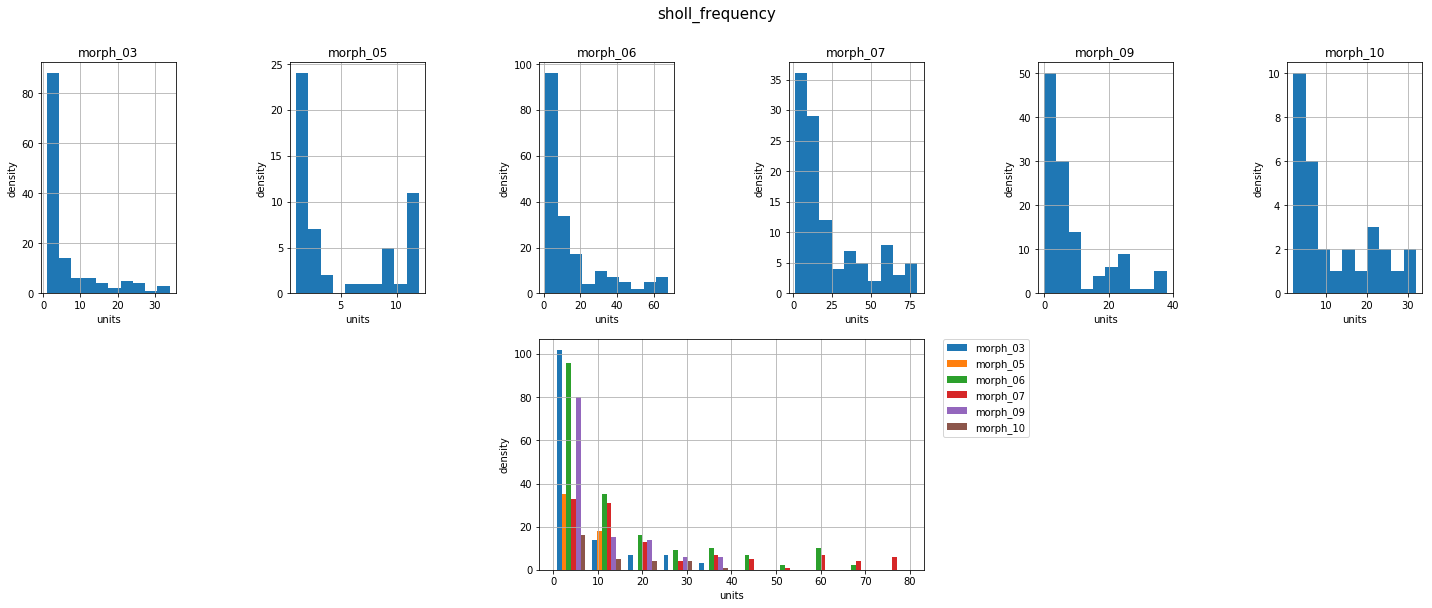

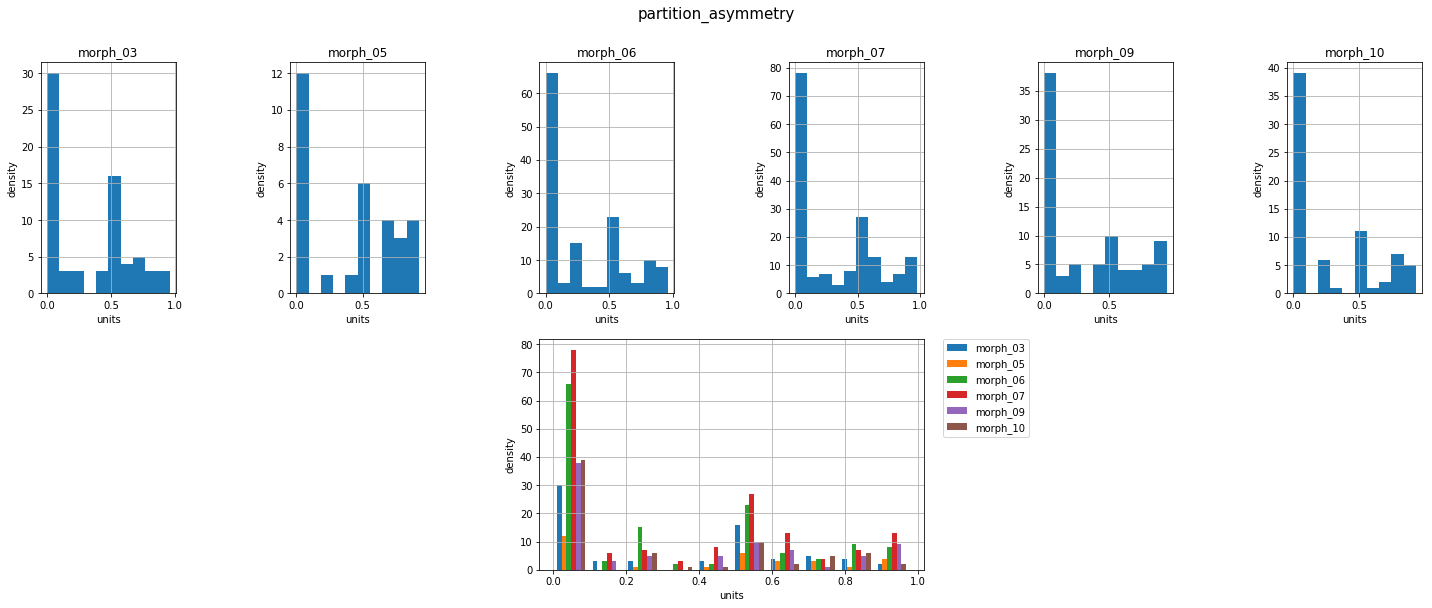

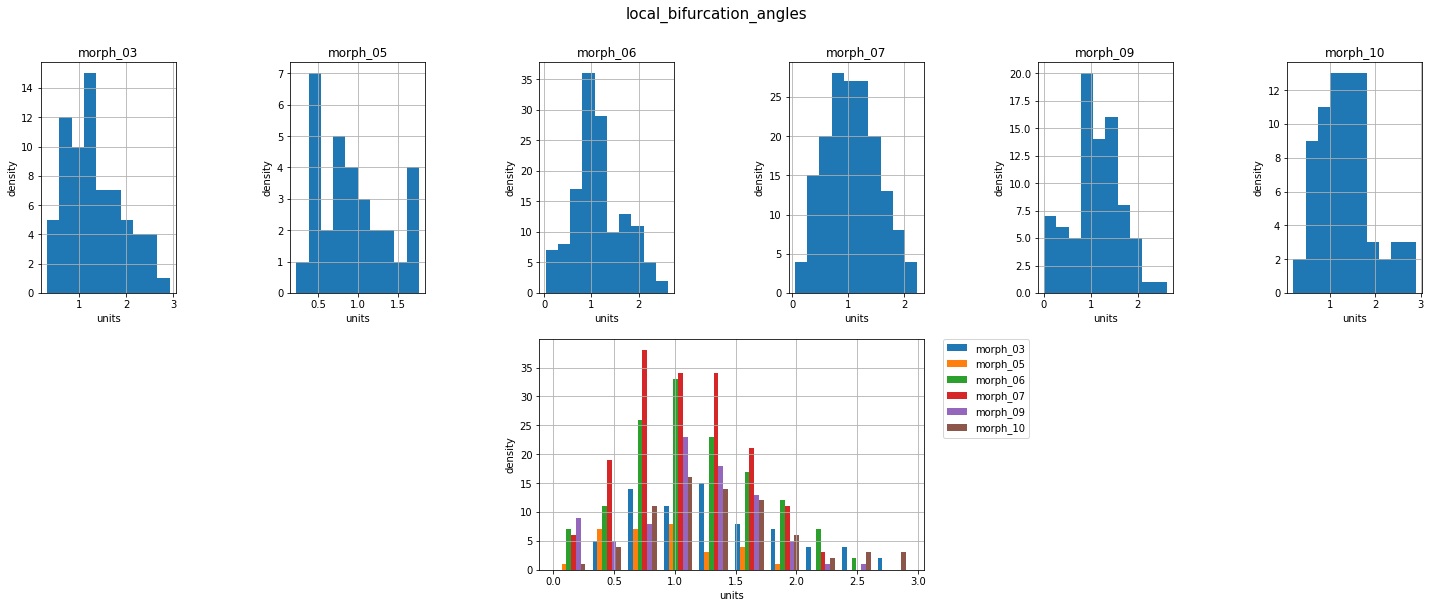

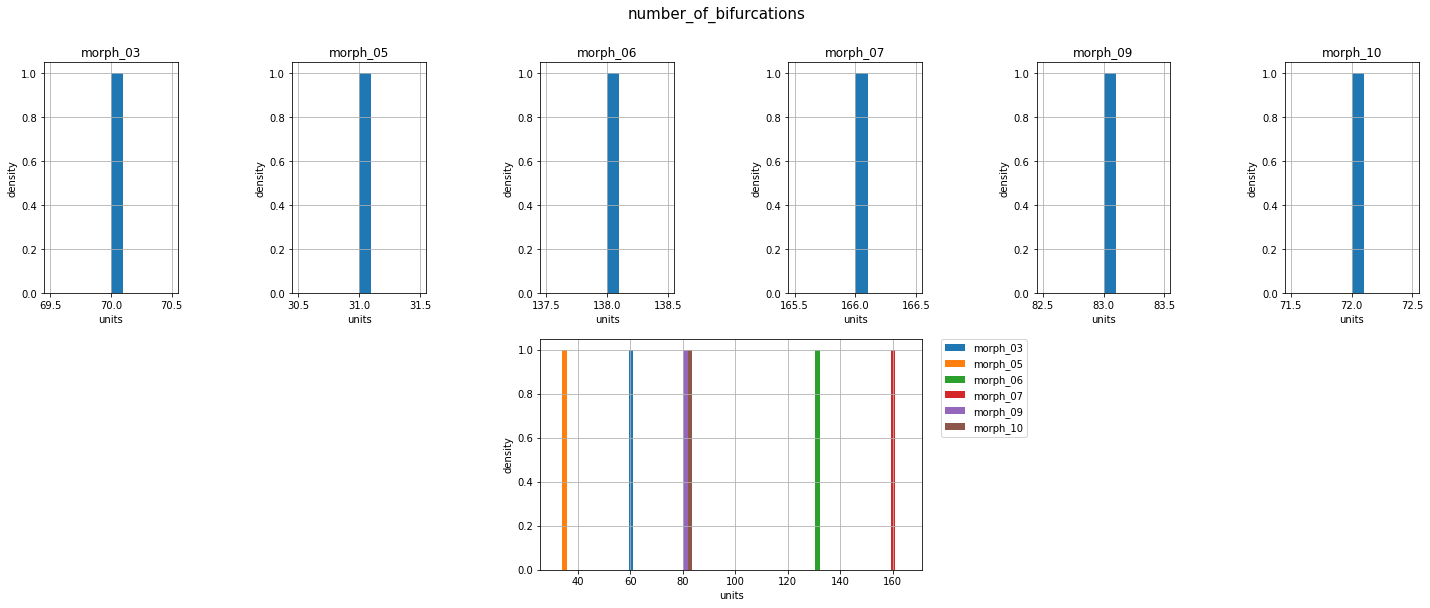

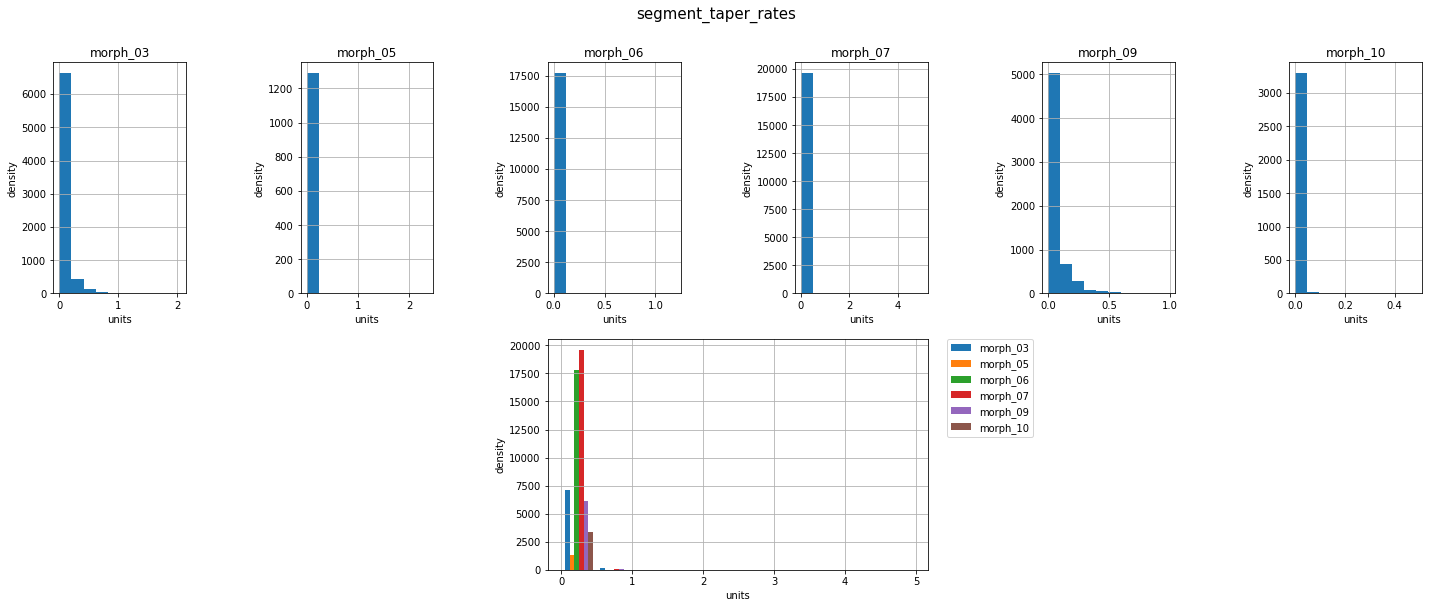

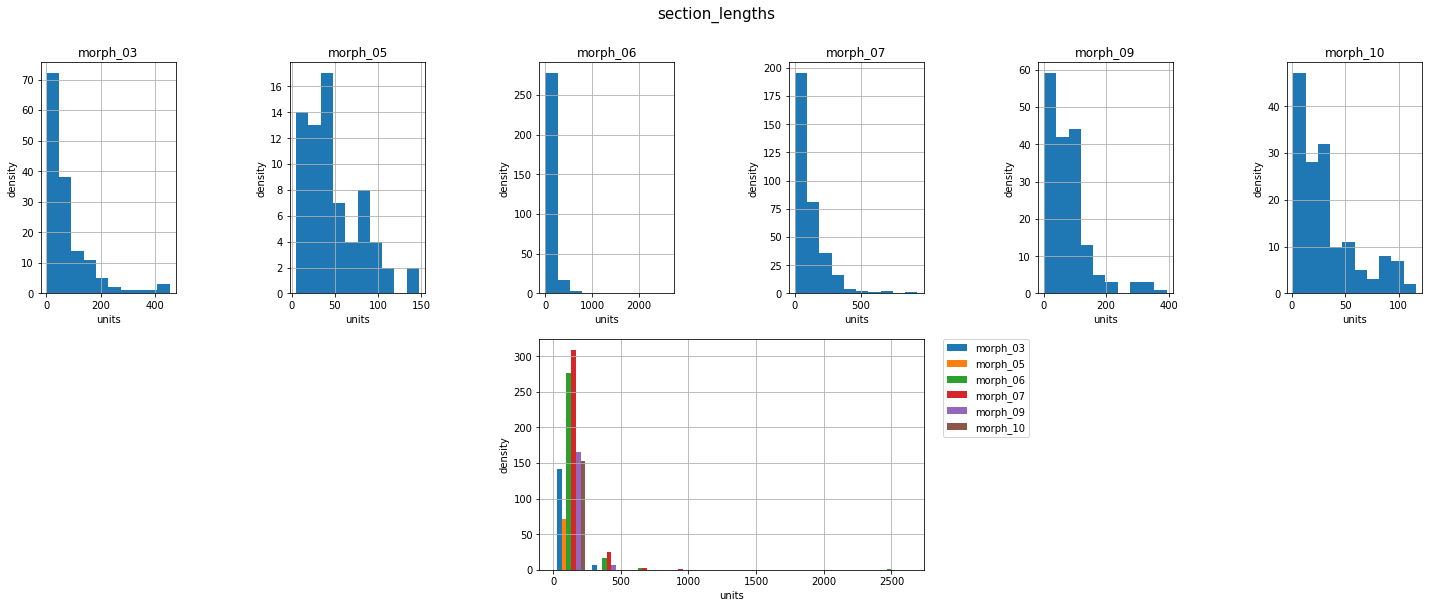

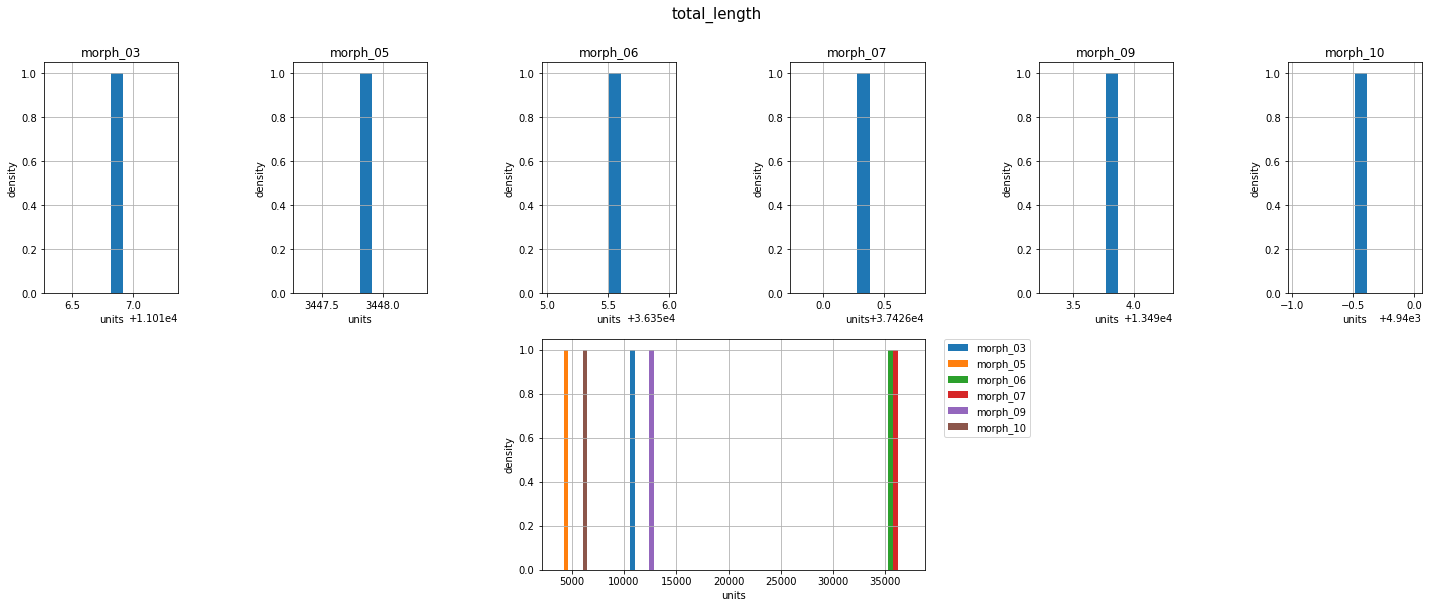

In [95]:
#3, 5, 6, 7, 9 & 10
import numpy as np
import neurom as nm
from neurom import viewer
from neurom.view import view
from neurom.view.common import update_plot_limits
import matplotlib.pyplot as plt

# Save neuron path of morphologies, morphometric features and create a dictionary to store the features values across morphologies
morphs = ['Group_01/00/morph_03.swc', 'Group_01/00/morph_05.swc', 'Group_01/00/morph_06.swc', 'Group_01/00/morph_07.swc', 'Group_01/00/morph_09.swc', 'Group_01/00/morph_10.swc']
features =  ['soma_radii', 'sholl_frequency', 'partition_asymmetry', 'local_bifurcation_angles', 'number_of_bifurcations', 'segment_taper_rates', 'section_lengths', 'total_length']
features_values = {'soma_radii': [],
                    'sholl_frequency': [],
                    'partition_asymmetry': [],
                    'local_bifurcation_angles': [],
                    'number_of_bifurcations': [],
                    'segment_taper_rates': [],
                    'section_lengths': [],
                    'total_length': []}

# Iterate across features to compute its values for each morphology.
# The final plot is a figure per feature in which it includes a subplot of the histogram of morphologies and merge the histograms for comparisons
for feature in features:
    # Create Figure for each feature
    values = []
    morphs_name = []
    fig = plt.figure(figsize=(20, 8))
    for i, nrn in enumerate(morphs):
        neuron = nm.load_neuron(nrn)
        value = nm.get(feature, neuron)
        values.append(value)
        features_values[feature] += [np.mean(value)]
        # Create subplots to include all morphologies
        ax = fig.add_subplot(2, len(morphs), i+1)
        histogram(value, ax)
        plt.grid(True)
        morphs_name.append(str(nrn).split('/')[2].split('.')[0])
        ax.set_title(str(nrn).split('/')[2].split('.')[0])
    ax = fig.add_subplot(2, len(morphs), (9,10))
    ax.hist(values, bins=10, label=morphs_name)
    ax.set_xlabel('units')
    ax.set_ylabel('density')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    fig.suptitle(str(feature), y=1.05, fontsize=15)
    fig.tight_layout()

### Discussion:

By plotting the histogram distribution by characteristics by cell, it is possible to identify which feature is more discriminant.  Then, by keeping the most helpful morphometric characteristics, it is possible to group cells.

From the plots above, three features helped us identify three categories of neurons.  These features were: soma radii, the sholl frequency distribution, and the number of bifurcations.  Other features (partition asymmetry and segment taper rate for instance) were not as decisive in discriminating the different cell types.

The morphology which was first singled out was morphology 05, due to the presence of a large soma radius (16.3 µm), the low sholl frequency (indicating the number of intersections plotted against the distance from the soma, as defined in paper 2), as well as a low number of bifucations (around 30).  According to paper 1 and 2, we hypothesis that this class refers to gabaergic interneurons (and most likely large basket cells), given its larger soma radius, its proximal arborization and low bifurcation number.

Another class which was identified contained morphology 06 and 07.  This class presented medium soma radius (around 10 µm), high sholl frequency (meaning that the high number of intersections was far away from the soma, probably refering to the apical dendrite of a pyramidal cell, most likely coming from layer 4 or 5 from the neocortex), a high number of bifurcations (138 and 166), and higher section length.

The remaining class which we grouped contained morphology 03, 09, and 10. These morphologies, were depicted as having smaller soma radii, sholl frequencies that ranged around 30 (between the two previously stated categories), and a number of bifurcations around 70-80.  However, we can note that morphology 10 differs from the other two when looking at their section length: which is considerably smaller (its maximum reaches only 100, while the other two have their distribution ranging up to 400).


### Would using a combination of morphometric characteristics improve the classification?

Using a combination would enable us to see for instance, for two feautres, which morphologies are closer together (clustering method).  As a result, this would improve our classification.  In the scatter plots below, we plotted pairs of relevant features, and managed to observe the classification into three classes that we had noted previously.  Thus, these scatter plots are coherent with our observations.

### Plotting Scatter plots between morphometric features across morphologies:

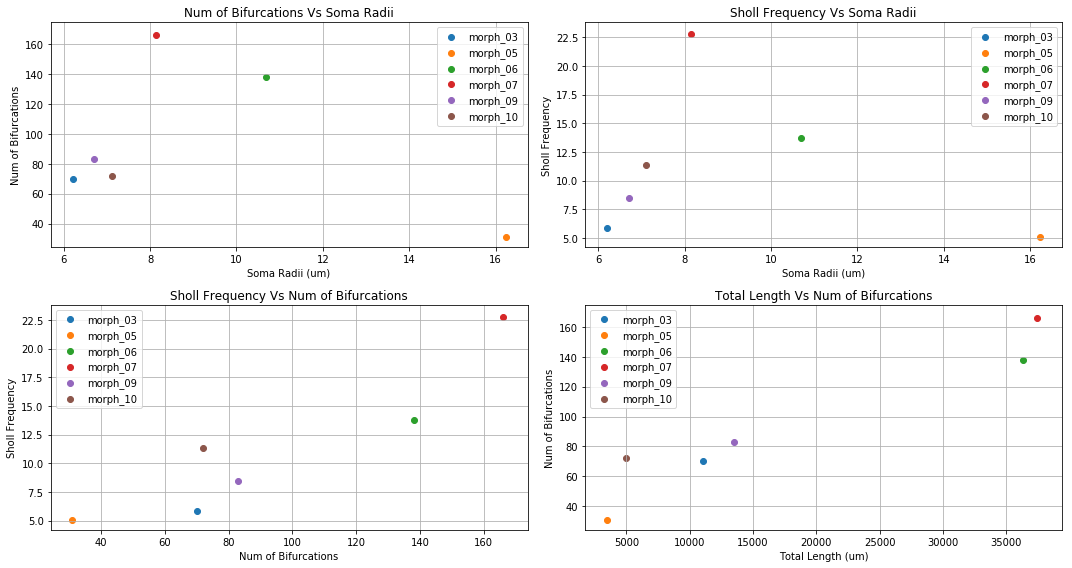

In [103]:
# Extract the values of the selected features from the dictionary
soma_radii = [features_values['soma_radii'][i] for i in range(len(features_values['soma_radii']))]
no_bifurc = [features_values['number_of_bifurcations'][i] for i in range(len(features_values['number_of_bifurcations']))]
sholl_freq = [features_values['sholl_frequency'][i] for i in range(len(features_values['sholl_frequency']))]
total_length = [features_values['total_length'][i] for i in range(len(features_values['total_length']))]

# Plot scatter plots for the selected features for classification
fig = plt.figure(figsize=(15, 8))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)
for i, morph in enumerate(morphs):
    ax0.scatter(soma_radii[i], no_bifurc[i], label=morphs_name[i])
    ax1.scatter(soma_radii[i], sholl_freq[i], label=morphs_name[i])
    ax2.scatter(no_bifurc[i], sholl_freq[i], label=morphs_name[i])
    ax3.scatter(total_length[i], no_bifurc[i], label=morphs_name[i])
ax0.legend()
ax0.set_xlabel('Soma Radii (um)')
ax0.set_ylabel('Num of Bifurcations')
ax0.grid(True)
ax0.set_title('Num of Bifurcations Vs Soma Radii')
ax1.legend()
ax1.set_xlabel('Soma Radii (um)')
ax1.set_ylabel('Sholl Frequency')
ax1.grid(True)
ax1.set_title('Sholl Frequency Vs Soma Radii')
ax2.legend()
ax2.set_xlabel('Num of Bifurcations')
ax2.set_ylabel('Sholl Frequency')
ax2.grid(True)
ax2.set_title('Sholl Frequency Vs Num of Bifurcations')
ax3.legend()
ax3.set_xlabel('Total Length (um)')
ax3.set_ylabel('Num of Bifurcations')
ax3.grid(True)
ax3.set_title('Total Length Vs Num of Bifurcations')
fig.tight_layout()

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex3 and Ex4.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://watermark.silverchair.com/bhy339.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAnwwggJ4BgkqhkiG9w0BBwagggJpMIICZQIBADCCAl4GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMjL2dxX4XnctI8PSkAgEQgIICL871rzxAccwBPnWDWJYXnmhez2c206RYVCnDmVVfJdui3Y0__27wwcSCeSvs8bMO-ySrUsntk8bkKC0g0_2zqK9F-IRlkpL4X120sWQoyjsnZSRgpQgBRjhTGqEiQFSv6VpT1NS7tw8Ytgz0nxRzd6uVmAJmm4hA3Qt6xerIeKCuUP2LZhWFPCkCqY9Z6vrTWs31nKibrYQyhfebtfrjQUXZM41f-jg19pGQW353OY8X8EHbnlzljAF25bPO1dFcoJ9z1YrIavhUJvrC_ROcrQ_xFpf43nLKtv44PxSR8ynIh1W87NKQjMy09q_SeEqL2rQcbMm_GxJp11_T39iAZeoghTOsj9nbJM1DcZ_EHiPDUimGWP-zX3GgPa5OFMYDW99UlS7aoEhLUMeNOagm1McT8U3SYyKYUSmKuWbxSE4vzzl6i4kfVTZinPCc2pJUO7foA11nzp8Od-BadQFDv4oC306nDSWJWe62Y4qbGmzR4MLnO_Gunf9wmszwyNHckn81sxPmTBmnTKYkYNJLUGjZFluRgw_Ssjvk42kBawDJ338-CdN0zTm7paxSSDTu32ZKLLaEjchehmkt5ecY3qn5cNXgAo-BGoMDN2Cl9h5F_NZlR4vTg2B3vRKKmKfjt1tLqoG8K4FrO3LNE8cmCZ-f3iFGSeDOD_VMFb5O0q68uqnlfRN6Ep56WChWSWRS92wNhGx7rUQAOvK7dJWK7oIPaxXBh55_RpZn2BQI0WQ)